# **Data Analytics on Steam Reviews**

### Steam Reviews Dataset Introduction:
The dataset contains over 6.4 million publicly available reviews in English from Steam Reviews portion of Steam store run by Valve,which represent a great opportunity to break down the satisfaction and dissatisfaction factors around games and genres, as well sentiment over time.  Each review is described by review text, the id of game it belongs to, review sentiment (positive or negative) and a number of users who thought the review was helpful.

# Part 1 : Data Processing

In [ ]:
# Import Required and General Libraries
import os
import zipfile
import pandas as pd
from google.colab import files
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('punkt_tab')
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
<ipython-input-1-26847d2e5fb0>:19: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina')


In [ ]:
# Download data file
!pip install -q gdown
!gdown 1VPaVJRhD--pDcXuBpEZiZ9hyUp1ZiiFJ  --output Steam_Reviews.zip

Downloading...
From (original): https://drive.google.com/uc?id=1VPaVJRhD--pDcXuBpEZiZ9hyUp1ZiiFJ
From (redirected): https://drive.google.com/uc?id=1VPaVJRhD--pDcXuBpEZiZ9hyUp1ZiiFJ&confirm=t&uuid=0a536237-d54e-45ae-af93-bdc219346ce9
To: /content/Steam_Reviews.zip
100% 719M/719M [00:12<00:00, 58.8MB/s]


In [ ]:
# Import zipfile
import zipfile
with zipfile.ZipFile("Steam_Reviews.zip", 'r') as zip_ref:
    zip_ref.extractall("Steam_Reviews")
print("Successfuly zip the file of Steam_Reviews")

Successfuly zip the file of Steam_Reviews


In [ ]:
# Find the path of the unzipped CSV file
import os
csv_files = [f for f in os.listdir('Steam_Reviews') if f.endswith('.csv')]
if len(csv_files) == 0:
    print("CSV file not found, please make sure the compressed package contains the CSV file.")
else:
    csv_file_path = os.path.join('Steam_Reviews', csv_files[0])
    df = pd.read_csv(csv_file_path)

In [ ]:
df

,app_id,app_name,review_text,review_score,review_votes
0,10,Counter-Strike,Ruined my life.,1,0
1,10,Counter-Strike,This will be more of a ''my experience with th...,1,1
2,10,Counter-Strike,This game saved my virginity.,1,0
3,10,Counter-Strike,• Do you like original games? • Do you like ga...,1,0
4,10,Counter-Strike,"Easy to learn, hard to master.",1,1
...,...,...,...,...,...
6417101,99910,Puzzle Pirates,I really ove this game but it needs somethings...,-1,0
6417102,99910,Puzzle Pirates,"Used to play Puzzel Pirates 'way back when', b...",-1,0
6417103,99910,Puzzle Pirates,"This game was aright, though a bit annoying. W...",-1,0
6417104,99910,Puzzle Pirates,"I had a nice review to recommend this game, bu...",-1,0


In [ ]:
#check missing value
missing_values = df.isnull().sum()
print("Missing value statistics：")
print(missing_values)

Missing value statistics：
app_id               0
app_name        183234
review_text       7305
review_score         0
review_votes         0
dtype: int64


In [ ]:
# Handling missing values
df = df.dropna()

In [ ]:
if 'df' in locals():
    sampled_df = df.sample(n=20000, random_state=42)
else:
    print("Data reading was unsuccessful and sampling cannot be performed.")

In [ ]:
sampled_df

,app_id,app_name,review_text,review_score,review_votes
3607269,291550,Brawlhalla,Early Access Review,1,0
694102,206440,To the Moon,i cried so hard when realize river made so muc...,1,0
6195257,65800,Dungeon Defenders,when i am done waching the vid in the begining...,-1,0
638277,205100,Dishonored,Dishonored starts out pretty grim as you find ...,1,0
5944031,536630,Maze Sounds,I wish the ' Do you recommend this game? ' had...,-1,0
...,...,...,...,...,...
6220745,6860,Hitman: Blood Money,"Great game, highly reccomended if you are into...",1,0
2637333,250400,How to Survive,Solid little zombie survival title. Totally li...,1,0
1792709,230410,Warframe,Nice game,1,0
334421,1250,Killing Floor,"Great Game, Very intense, and Loads of wepons.",1,0


# Part 2 : Descriptive Analytics

Average review length: 55.3631
Minimize review length: 0
Maximize review length: 1925


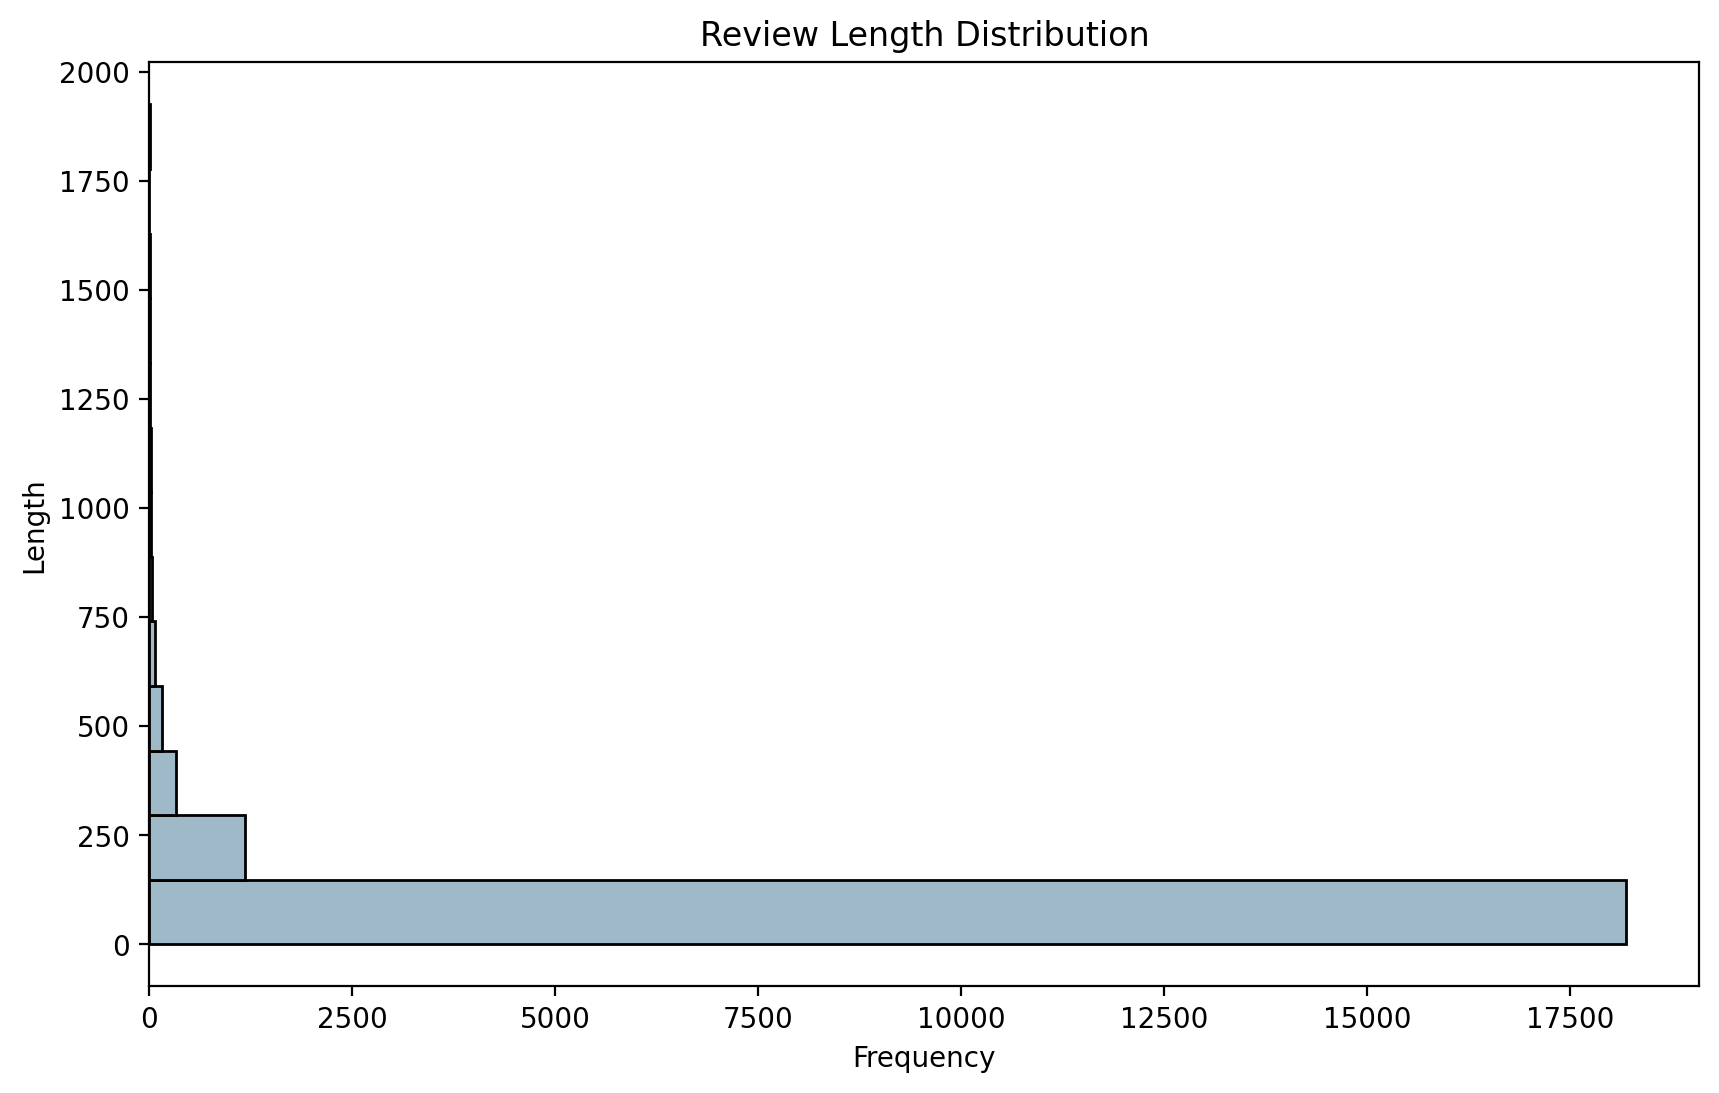

In [ ]:
#1. Reviews lenth distribution
if'review_text' in sampled_df.columns:
    # Calculate comment length
    sampled_df['review_length'] = sampled_df['review_text'].apply(lambda x: len(x.split()))
    avg_review_length = sampled_df['review_length'].mean()
    min_review_length = sampled_df['review_length'].min()
    max_review_length = sampled_df['review_length'].max()
    print(f"Average review length: {avg_review_length}")
    print(f"Minimize review length: {min_review_length}")
    print(f"Maximize review length: {max_review_length}")


    morandi_blue = '#80a2b7'

    # Draw a histogram of comment length
    plt.figure(figsize=(10, 6))

    ax = sns.histplot(data=sampled_df, y='review_length', binwidth=150, color=morandi_blue)
    plt.title('Review Length Distribution')
    plt.xlabel('Frequency')
    plt.ylabel('Length')
    plt.show()

##**Findings:**
Short reviews dominate, while long reviews are in the minority. There is a distinct peak at a length of approximately 200, with the frequency reaching 1925. This indicates that most users tend to write concise reviews. The frequencies representing longer reviews are relatively low, suggesting that users generally do not write in - depth and exhaustive reviews.

Given this distribution, game developers and platform operators need to focus on understanding the key messages that users are trying to convey in these short reviews. If they hope to obtain more in - depth feedback, they can consider implementing strategies to encourage users to write longer reviews.

Sentiment Distribution：
review_score
-1     3544
 1    16456
Name: count, dtype: int64


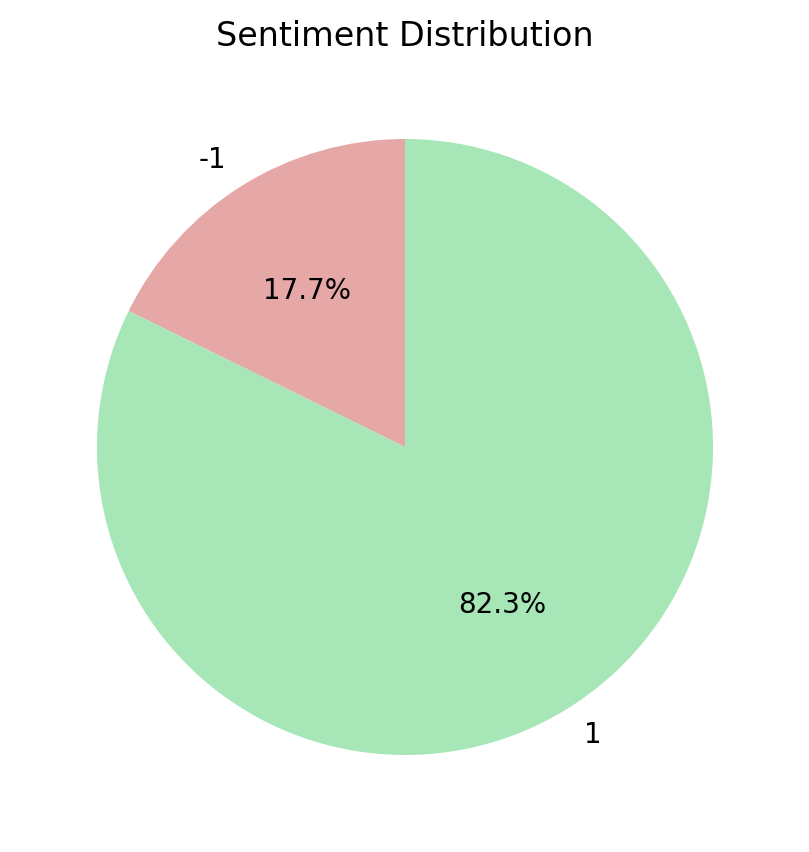

In [ ]:
# 2. Sentiment distribution analysis (1 represents positive, -1 represents negative)
if'review_score' in sampled_df.columns:
    sentiment_counts = sampled_df['review_score'].value_counts()


    ordered_index = [-1, 1]
    sentiment_counts = sentiment_counts.reindex(ordered_index, fill_value=0)

    print("Sentiment Distribution：")
    print(sentiment_counts)


    morandi_red = '#e6a7a7'
    morandi_green = '#a7e6b7'
    colors = [morandi_red, morandi_green]

    # Draw a sentiment distribution pie chart
    plt.figure(figsize=(5, 5))
    plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)
    plt.title('Sentiment Distribution')
    plt.show()

## **Findings:**
As can be seen from the pie chart and statistical data, positive reviews account for 82.3%, with the number reaching 16,456, while negative reviews account for 17.7%, with the number being 3,544. This indicates that the overall sentiment in these reviews is predominantly positive, suggesting that most users have a relatively satisfactory experience with the relevant games.

This is a positive signal for game developers, indicating that most of the games have a certain audience base and level of recognition in the market. However, it also reflects that there are some aspects of the games that dissatisfy players. Developers can further analyze the specific content of these negative reviews in depth, such as whether there are technical issues in the game (such as lag and bugs), or whether certain game designs do not meet players' preferences, so as to make targeted optimizations and improvements.


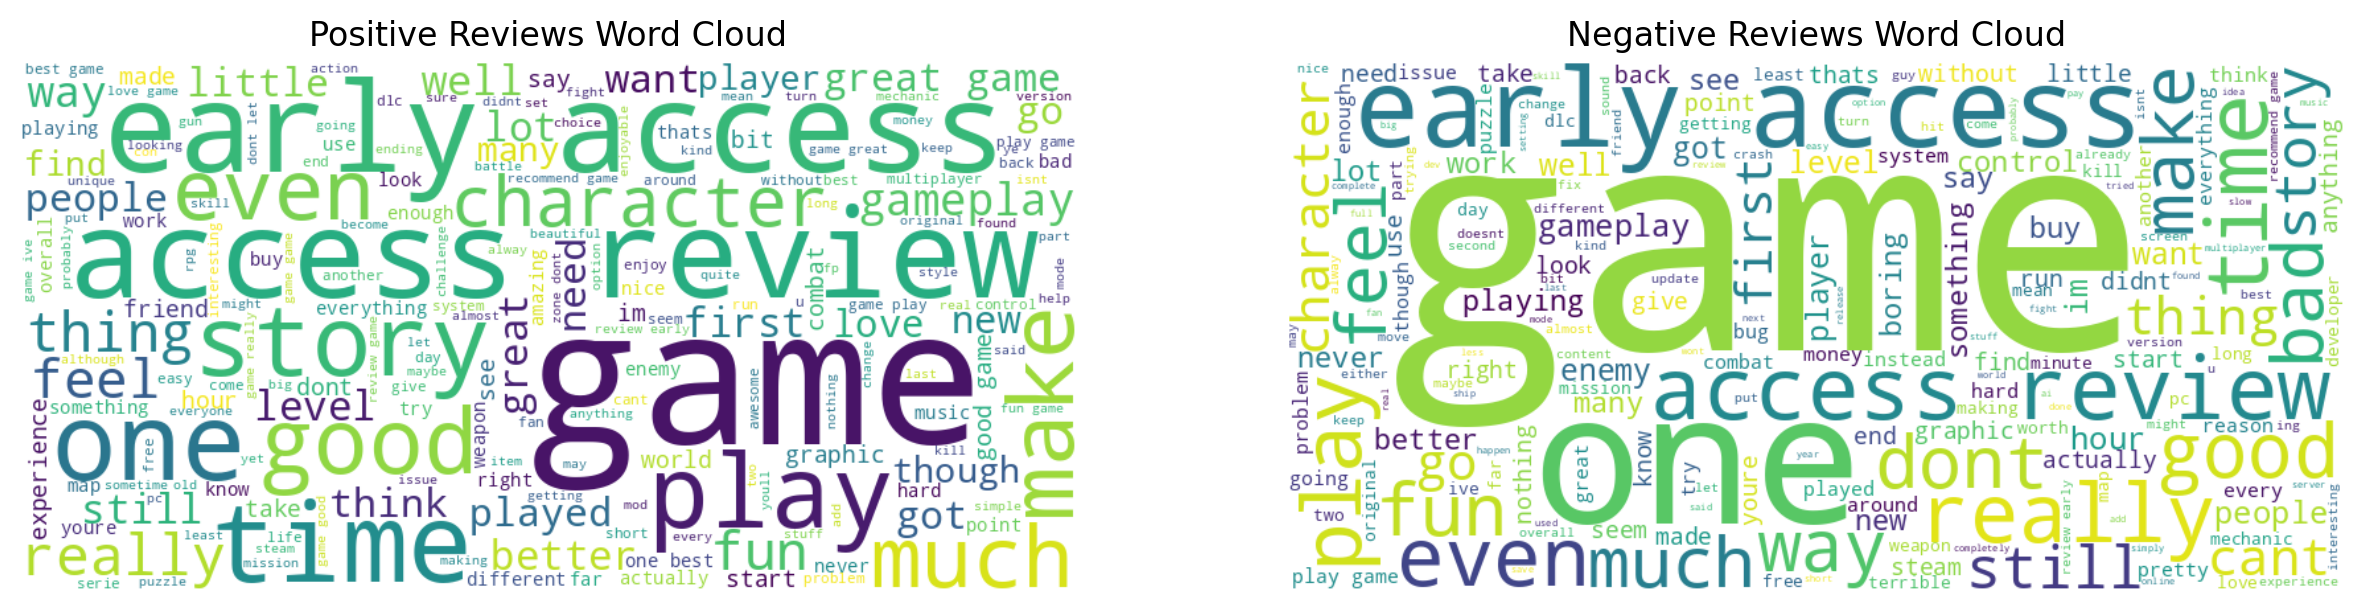

In [ ]:
#3. Positive and negative reviews wordcloud
# Display Graphics
def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove special characters and punctuation
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    # tokens
    tokens = nltk.word_tokenize(text)
    # stop words
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # lemmatizer
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]
    # Reassemble into text
    cleaned_text = " ".join(lemmatized_tokens)
    return cleaned_text

# Divide positive and negative review data
positive_reviews = sampled_df[sampled_df['review_score'] == 1]['review_text']
negative_reviews = sampled_df[sampled_df['review_score'] == -1]['review_text']

# Clean up the positive and negative review text
positive_cleaned = positive_reviews.apply(clean_text)
negative_cleaned = negative_reviews.apply(clean_text)

# Merge positive and negative review text
positive_text = " ".join(positive_cleaned)
negative_text = " ".join(negative_cleaned)

# Generate positive word cloud
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

# Generate negative word cloud
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

# Show positive word cloud
plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Positive Reviews Word Cloud')
plt.axis('off')

# Show negative word cloud
plt.subplot(1, 2, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Negative Reviews Word Cloud')
plt.axis('off')

plt.show()

## **Findings:**
### Analysis of Positive Reviews Word Cloud
Words such as "game", "play", "playtime", and "gameplay" appear frequently, indicating that in positive reviews, players emphasize the playability of the game itself and the experience brought by the playing duration. The relatively high frequency of "early access" implies that the game is in the early access phase, yet players have a high acceptance of it. It is likely that the game has demonstrated good quality during the early access period, prompting players to remain interested and engaged. The word "story" suggests that the game's storyline is also a factor attracting players; "character" indicates that the character - building in the game has highlights; and "music" implies that the game's soundtrack has been recognized by players. These elements jointly enhance the overall gaming experience.

### Analysis of Negative Reviews Word Cloud
"Early access" is also prominent in the negative reviews word cloud, suggesting that players have many complaints about the game's early access phase. There may be issues such as incomplete functionality and poor stability during this stage. Words like "gameplay" and "control" indicate that there may be flaws in the game's gameplay mechanics or controls, leading to a poor player experience, such as unsmooth operation and unreasonable gameplay design.


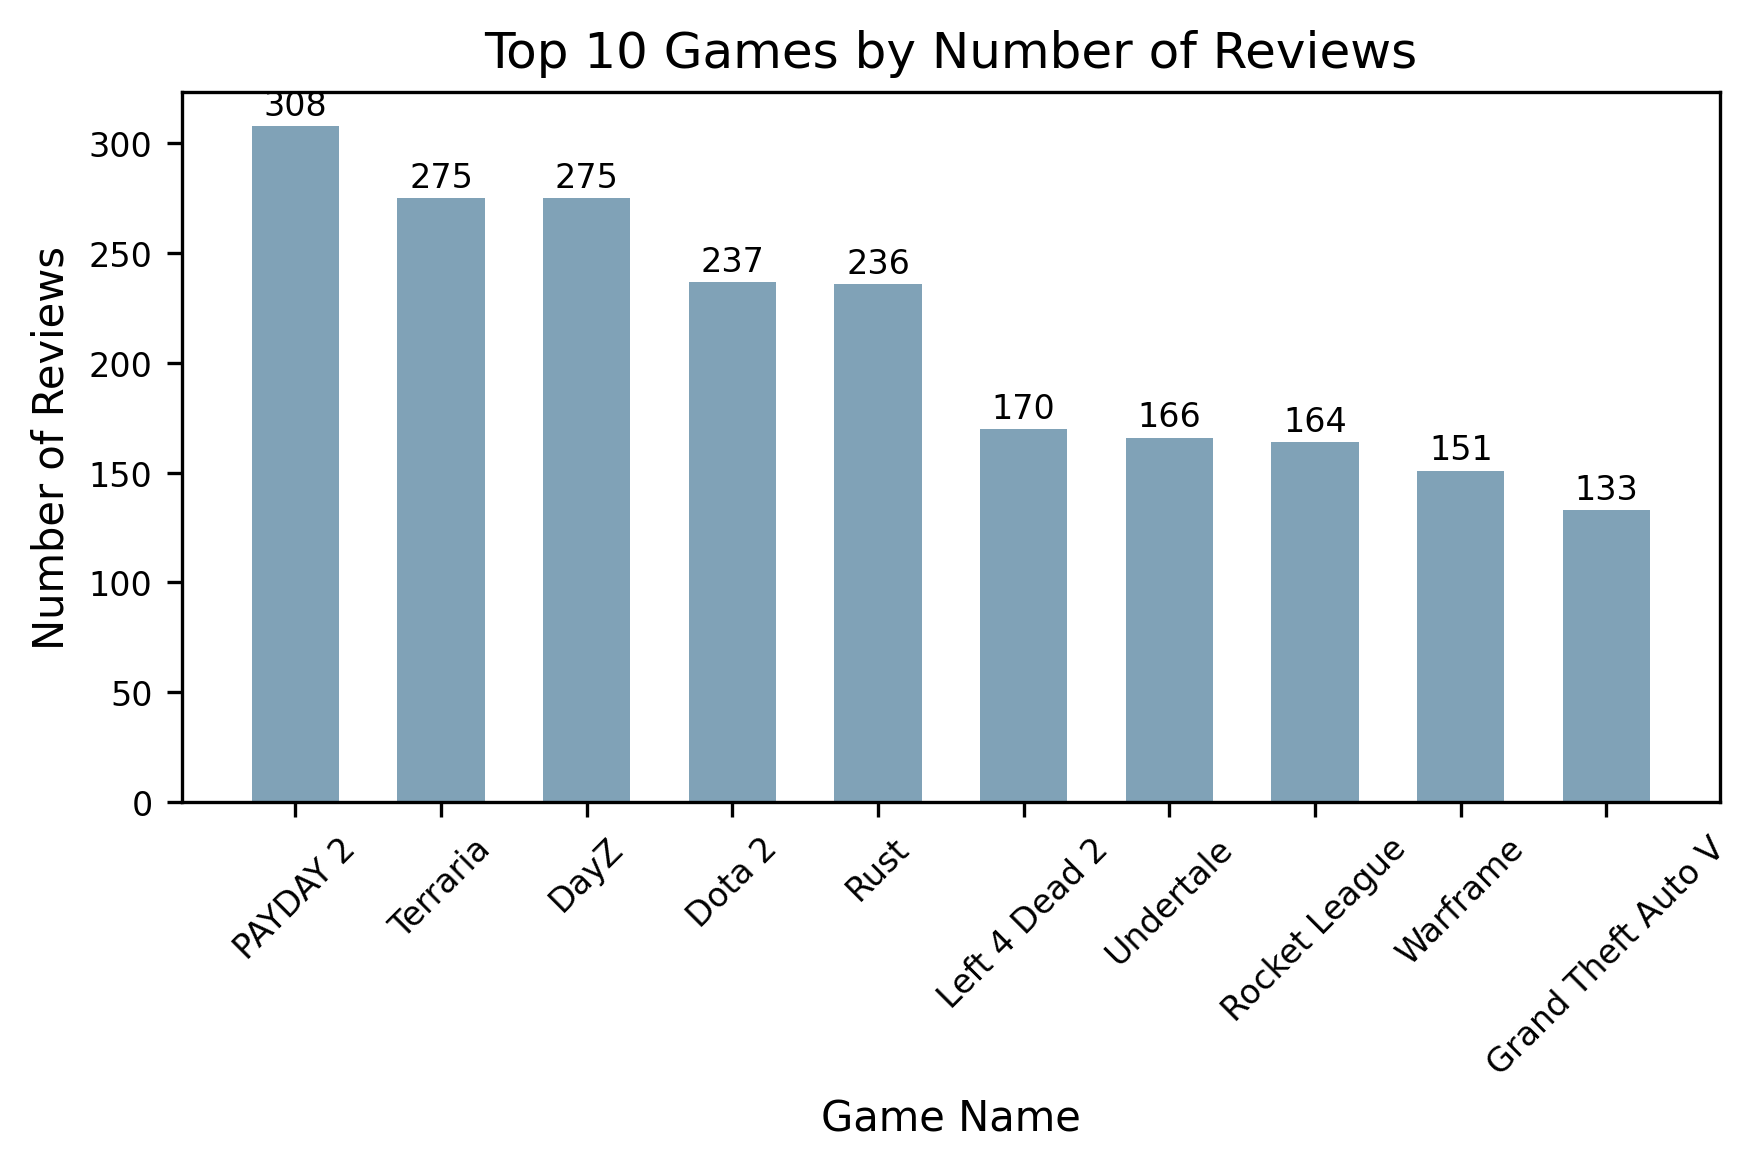

In [ ]:
#4. top 10 games by reviews number
# Count the number of reviews for each game
game_counts = sampled_df['app_name'].value_counts()

# Select the top ten games and their number of reviews
top_10_games = game_counts.head(10)

plt.rcParams['figure.dpi'] = 150

plt.figure(figsize=(6, 4))

morandi_blue = '#80a2b7'


bars = plt.bar(top_10_games.index, top_10_games.values, width=0.6, color=morandi_blue)

for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 1),
                 textcoords="offset points",
                 ha='center', va='bottom',
                 fontsize=8)

plt.title('Top 10 Games by Number of Reviews', fontsize=12)
plt.xlabel('Game Name', fontsize=10)
plt.ylabel('Number of Reviews', fontsize=10)

plt.xticks(rotation=45, fontsize=8)
plt.yticks(fontsize=8)


plt.tight_layout()

# Display Graphics
plt.show()

## **Findings:**
"PAYDAY 2" tops the list with 308 reviews, indicating that it is highly regarded and attracts a great deal of attention among the player community. "Terraria" and "DayZ" both have 275 reviews, ranking second jointly. The small gap between them and the first - ranked game suggests that these two games also boast large and active player communities.

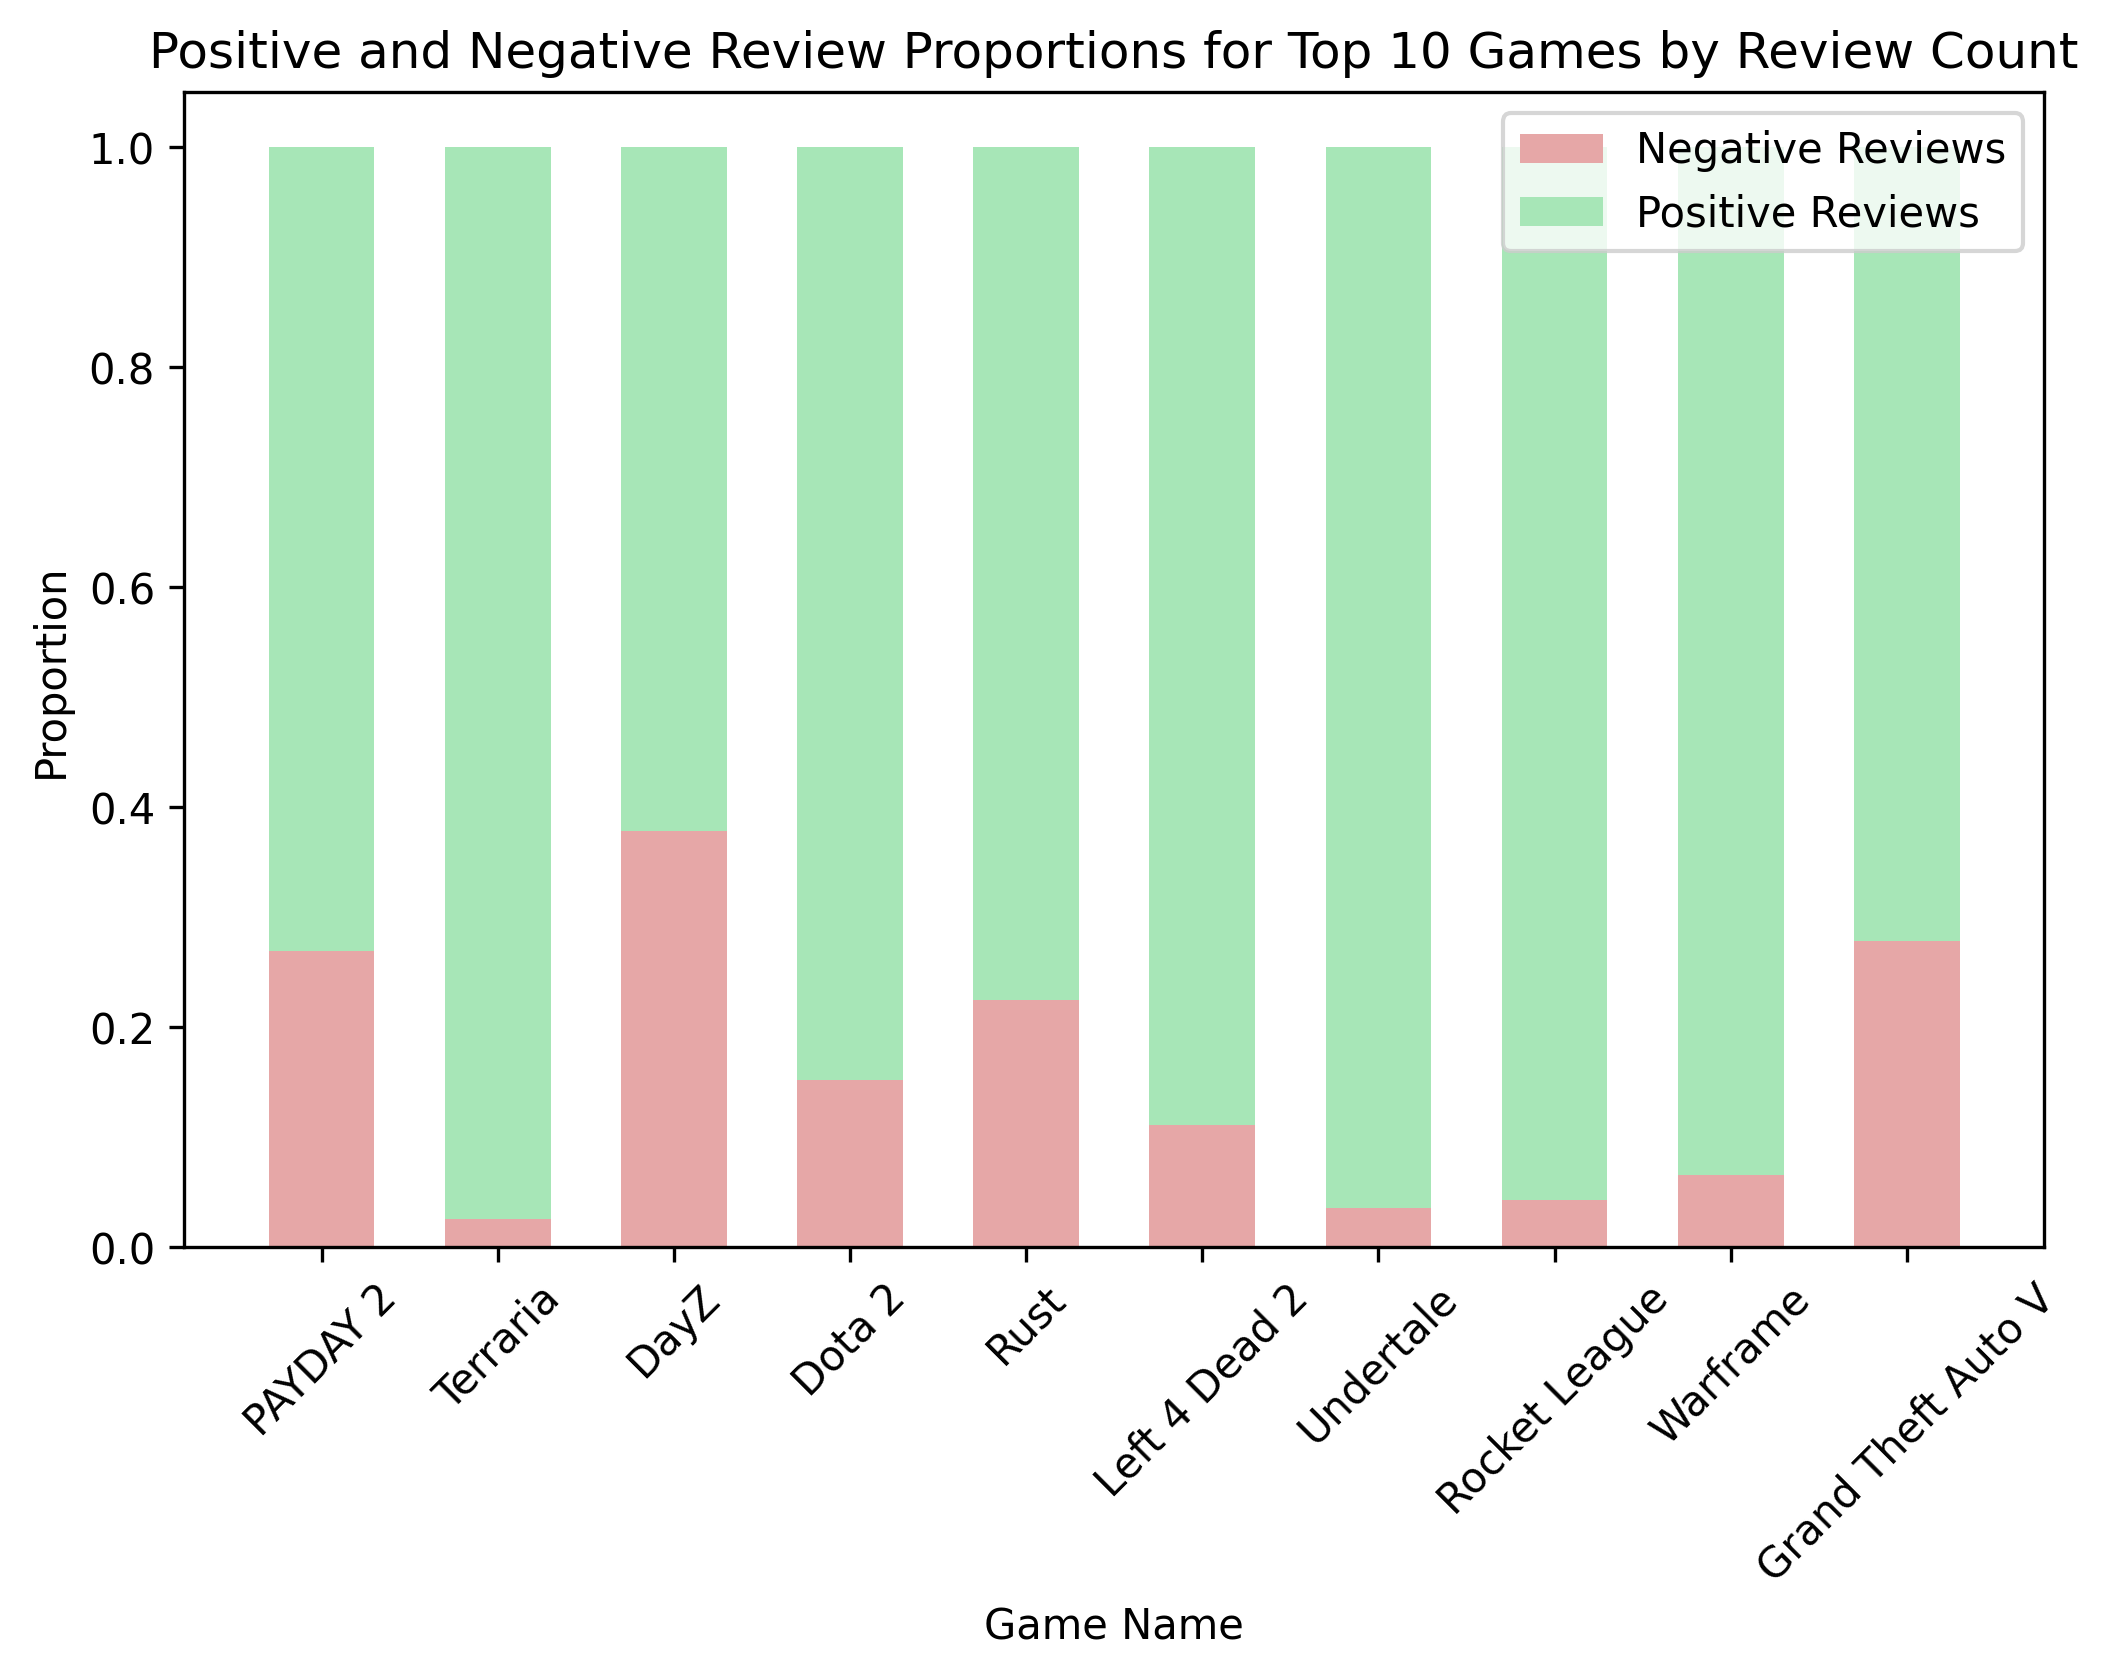

In [ ]:
#5.Positive and negative reviews proportions for top 10 games by reviews counts
# Select the top ten games by number of reviews
top_10_games = game_counts.head(10).index

# Filter out the data of the top 10 games with the most comments
top_10_df = sampled_df[sampled_df['app_name'].isin(top_10_games)]

# Group and count by game name and sentiment score
grouped = top_10_df.groupby(['app_name', 'review_score']).size().unstack()

# Make sure the sum of the number of positive and negative reviews in each row (for each game) is not 0 to avoid division by zero errors
grouped = grouped.fillna(0)

# Calculate the ratio of positive and negative comments, making sure the sum of each row is 1
total_reviews = grouped.sum(axis=1)
positive_proportions = grouped[1] / total_reviews
negative_proportions = grouped[-1] / total_reviews

# Set the graphic size
plt.figure(figsize=(8, 5))

morandi_red = '#e6a7a7'
morandi_green = '#a7e6b7'

# Draw a stacked column chart
width = 0.6
for i, game in enumerate(top_10_games):
    plt.bar(i, negative_proportions[game], width=width, color=morandi_red, label='Negative Reviews' if i == 0 else "")
    plt.bar(i, positive_proportions[game], width=width, bottom=negative_proportions[game], color=morandi_green, label='Positive Reviews' if i == 0 else "")

plt.xticks(range(len(top_10_games)), top_10_games, rotation=45)


plt.title('Positive and Negative Review Proportions for Top 10 Games by Review Count')
plt.xlabel('Game Name')
plt.ylabel('Proportion')


plt.legend()

plt.show()

## **Findings:**
As can be seen from the chart, among the top 10 games in terms of the number of reviews, the proportion of positive reviews for most games is much higher than that of negative reviews, indicating that overall, players are relatively satisfied with these games, and the games have been recognized by players in terms of gameplay, content, or experience. For DayZ, the proportion of negative reviews is relatively high compared to these games. In contrast, for Undertale, Rocket League, Warframe, and Grand Theft Auto V, the proportion of negative reviews is relatively low.

For games with a relatively high proportion of negative reviews, developers need to deeply analyze player feedback, identify the root causes of the problems, and address them to improve player satisfaction. For games with a low proportion of negative reviews, developers can continue to maintain their advantages, while also paying attention to new player demands and continuously optimizing the games to strengthen their good reputation.

# Part 3 : LDA Model

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from nltk.corpus import wordnet
nltk.download('averaged_perceptron_tagger_eng')

def clean2text(text):
    # Expanded stopword list, remove common high frequency words in game reviews
    custom_stopwords = set(stopwords.words('english')) | {
        'game', 'play', 'like', 'good', 'great', 'one', 'get', 'would', 'really'
    }

    text = text.lower()
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)  # Keep the numbers
    tokens = word_tokenize(text)
    tokens = [t for t in tokens if t not in custom_stopwords and len(t) > 2]  # Filter short words

    # Perform part-of-speech tagging and lemmatization on words in the text
    pos_tags = pos_tag(tokens) # Part-of-speech tagging, returns a tuple containing word and part-of-speech
    lemmatizer = WordNetLemmatizer() # Lemmatizer
    tokens = [
        lemmatizer.lemmatize(token, pos=get_wordnet_pos(tag))
        for token, tag in pos_tags
    ]
    return " ".join(tokens)

# Convert part-of-speech tags from Treebank to WordNet part-of-speech tag format
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'): # Expressing adjectives
        return wordnet.ADJ
    elif treebank_tag.startswith('V'): # Expressing verbs
        return wordnet.VERB
    elif treebank_tag.startswith('N'): # Expressing noun
        return wordnet.NOUN
    elif treebank_tag.startswith('R'): # Expressing adverb
        return wordnet.ADV
    else:
        return wordnet.NOUN

# Preprocess the original data to generate a new ‘cleaned_text' column
model_df = sampled_df[['app_id', 'app_name', 'review_text', 'review_score', 'review_votes', 'review_length']].copy()
model_df['cleaned_text'] = model_df['review_text'].apply(clean2text)

# Delete comments with empty text after cleaning
model_df = model_df[model_df['cleaned_text'].str.strip() != '']

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


In [ ]:
# 1. Convert the cleaned text into a TF-IDF matrix
tfidf = TfidfVectorizer(
    max_df=0.85,     # Ignore words that appear in more than 85% of the documents, such as ‘the’, ‘and’
    min_df=5,       # Only consider words that appear in at least 5 documents, removing words that appear very rarely in the documents
    max_features=500,   # Only the 500 most representative words are retained
    ngram_range=(1, 2)  # Allows unigrams and bigrams
)
tfidf_matrix = tfidf.fit_transform(model_df['cleaned_text'])

# Check and remove all zero rows
empty_rows = (tfidf_matrix.sum(axis=1) == 0).A.flatten()
if empty_rows.any():
    print(f"Delete {empty_rows.sum()} completely zero texts")
    model_df = model_df[~empty_rows].reset_index(drop=True)
    tfidf_matrix = tfidf_matrix[~empty_rows]

# 2. LDA Topic Modeling
n_topics = 8
lda = LatentDirichletAllocation(
    n_components=n_topics,
    learning_method='online',
    learning_offset=10.,   # Controlling the learning rate offset
    random_state=42,
    doc_topic_prior=0.1,   # Lower values make each document more likely to focus on a few topics
    topic_word_prior=0.01   # Lower values ​​make the vocabulary for each topic more focused.
)
lda.fit(tfidf_matrix)

# 3. Get topic distribution
topic_distributions = lda.transform(tfidf_matrix)
model_df['dominant_topic'] = topic_distributions.argmax(axis=1)

# 4. Function to automatically generate topic tags
def generate_topic_labels(model, feature_names, n_label_words=3):
    topic_labels = {}
    for topic_idx in range(model.n_components):
        # Get the top n_label_words words with the highest weight
        top_indices = model.components_[topic_idx].argsort()[::-1][:n_label_words]
        top_words = [feature_names[i] for i in top_indices]
        # Use _ to connect keywords as tags
        label = "_".join(top_words)
        topic_labels[topic_idx] = label
    return topic_labels

# Generate hashtags using the first 3 keywords
topic_labels = generate_topic_labels(lda, tfidf.get_feature_names_out(), n_label_words=3)

# 5. Function to print theme
def print_topics(model, feature_names, n_top_words=10):
    print("\n=== Topic high frequency words ===")
    for topic_idx in range(model.n_components):
        # Get the top n_top_words keywords
        top_words = [feature_names[i]
                    for i in model.components_[topic_idx].argsort()[:-n_top_words-1:-1]]
        # Get automatically generated tags
        label = topic_labels[topic_idx]
        print(f"Topic {topic_idx} - {label}:")
        print(" Keywords:", " | ".join(top_words), "\n")

print_topics(lda, tfidf.get_feature_names_out())

Delete 564 completely zero texts

=== Topic high frequency words ===
Topic 0 - access review_early access_access:
 Keywords: access review | early access | access | early | review | story | funny | awesome | find | series 

Topic 1 - nice_worth_well:
 Keywords: nice | worth | well | money | crash | story | life | day | fun | space 

Topic 2 - love_hour_fun:
 Keywords: love | hour | fun | play | make | game | suck | steam | story | time 

Topic 3 - best_ever_ever play:
 Keywords: best | ever | ever play | play | game | recommend | bad | amaze | ive | ive ever 

Topic 4 - make_time_fun:
 Keywords: make | time | fun | game | well | play | story | get | even | much 

Topic 5 - awesome_ing_funny:
 Keywords: awesome | ing | funny | addictive | pretty | get | old | much | year | still 

Topic 6 - 1010_friend_kill:
 Keywords: 1010 | friend | kill | simulator | zombie | must | want | die | people | try 

Topic 7 - fun_buy_cool:
 Keywords: fun | buy | cool | free | lot | dont | mod | need | time

According to the high-frequency words of each topic, I artificially refined and summarized these words based on my understanding of the game industry, and gave each topic a summary word, which are:

Topic 0: Early Access,

Topic 1: Cost performance and storytelling,

Topic 2: Game fun and time investment,

Topic 3: Best Game,

Topic 4: Game Production and Time Management,

Topic 5: Fun and attractive,

Topic 6: Survival games and sociality,

Topic 7: Shopping and Entertainment

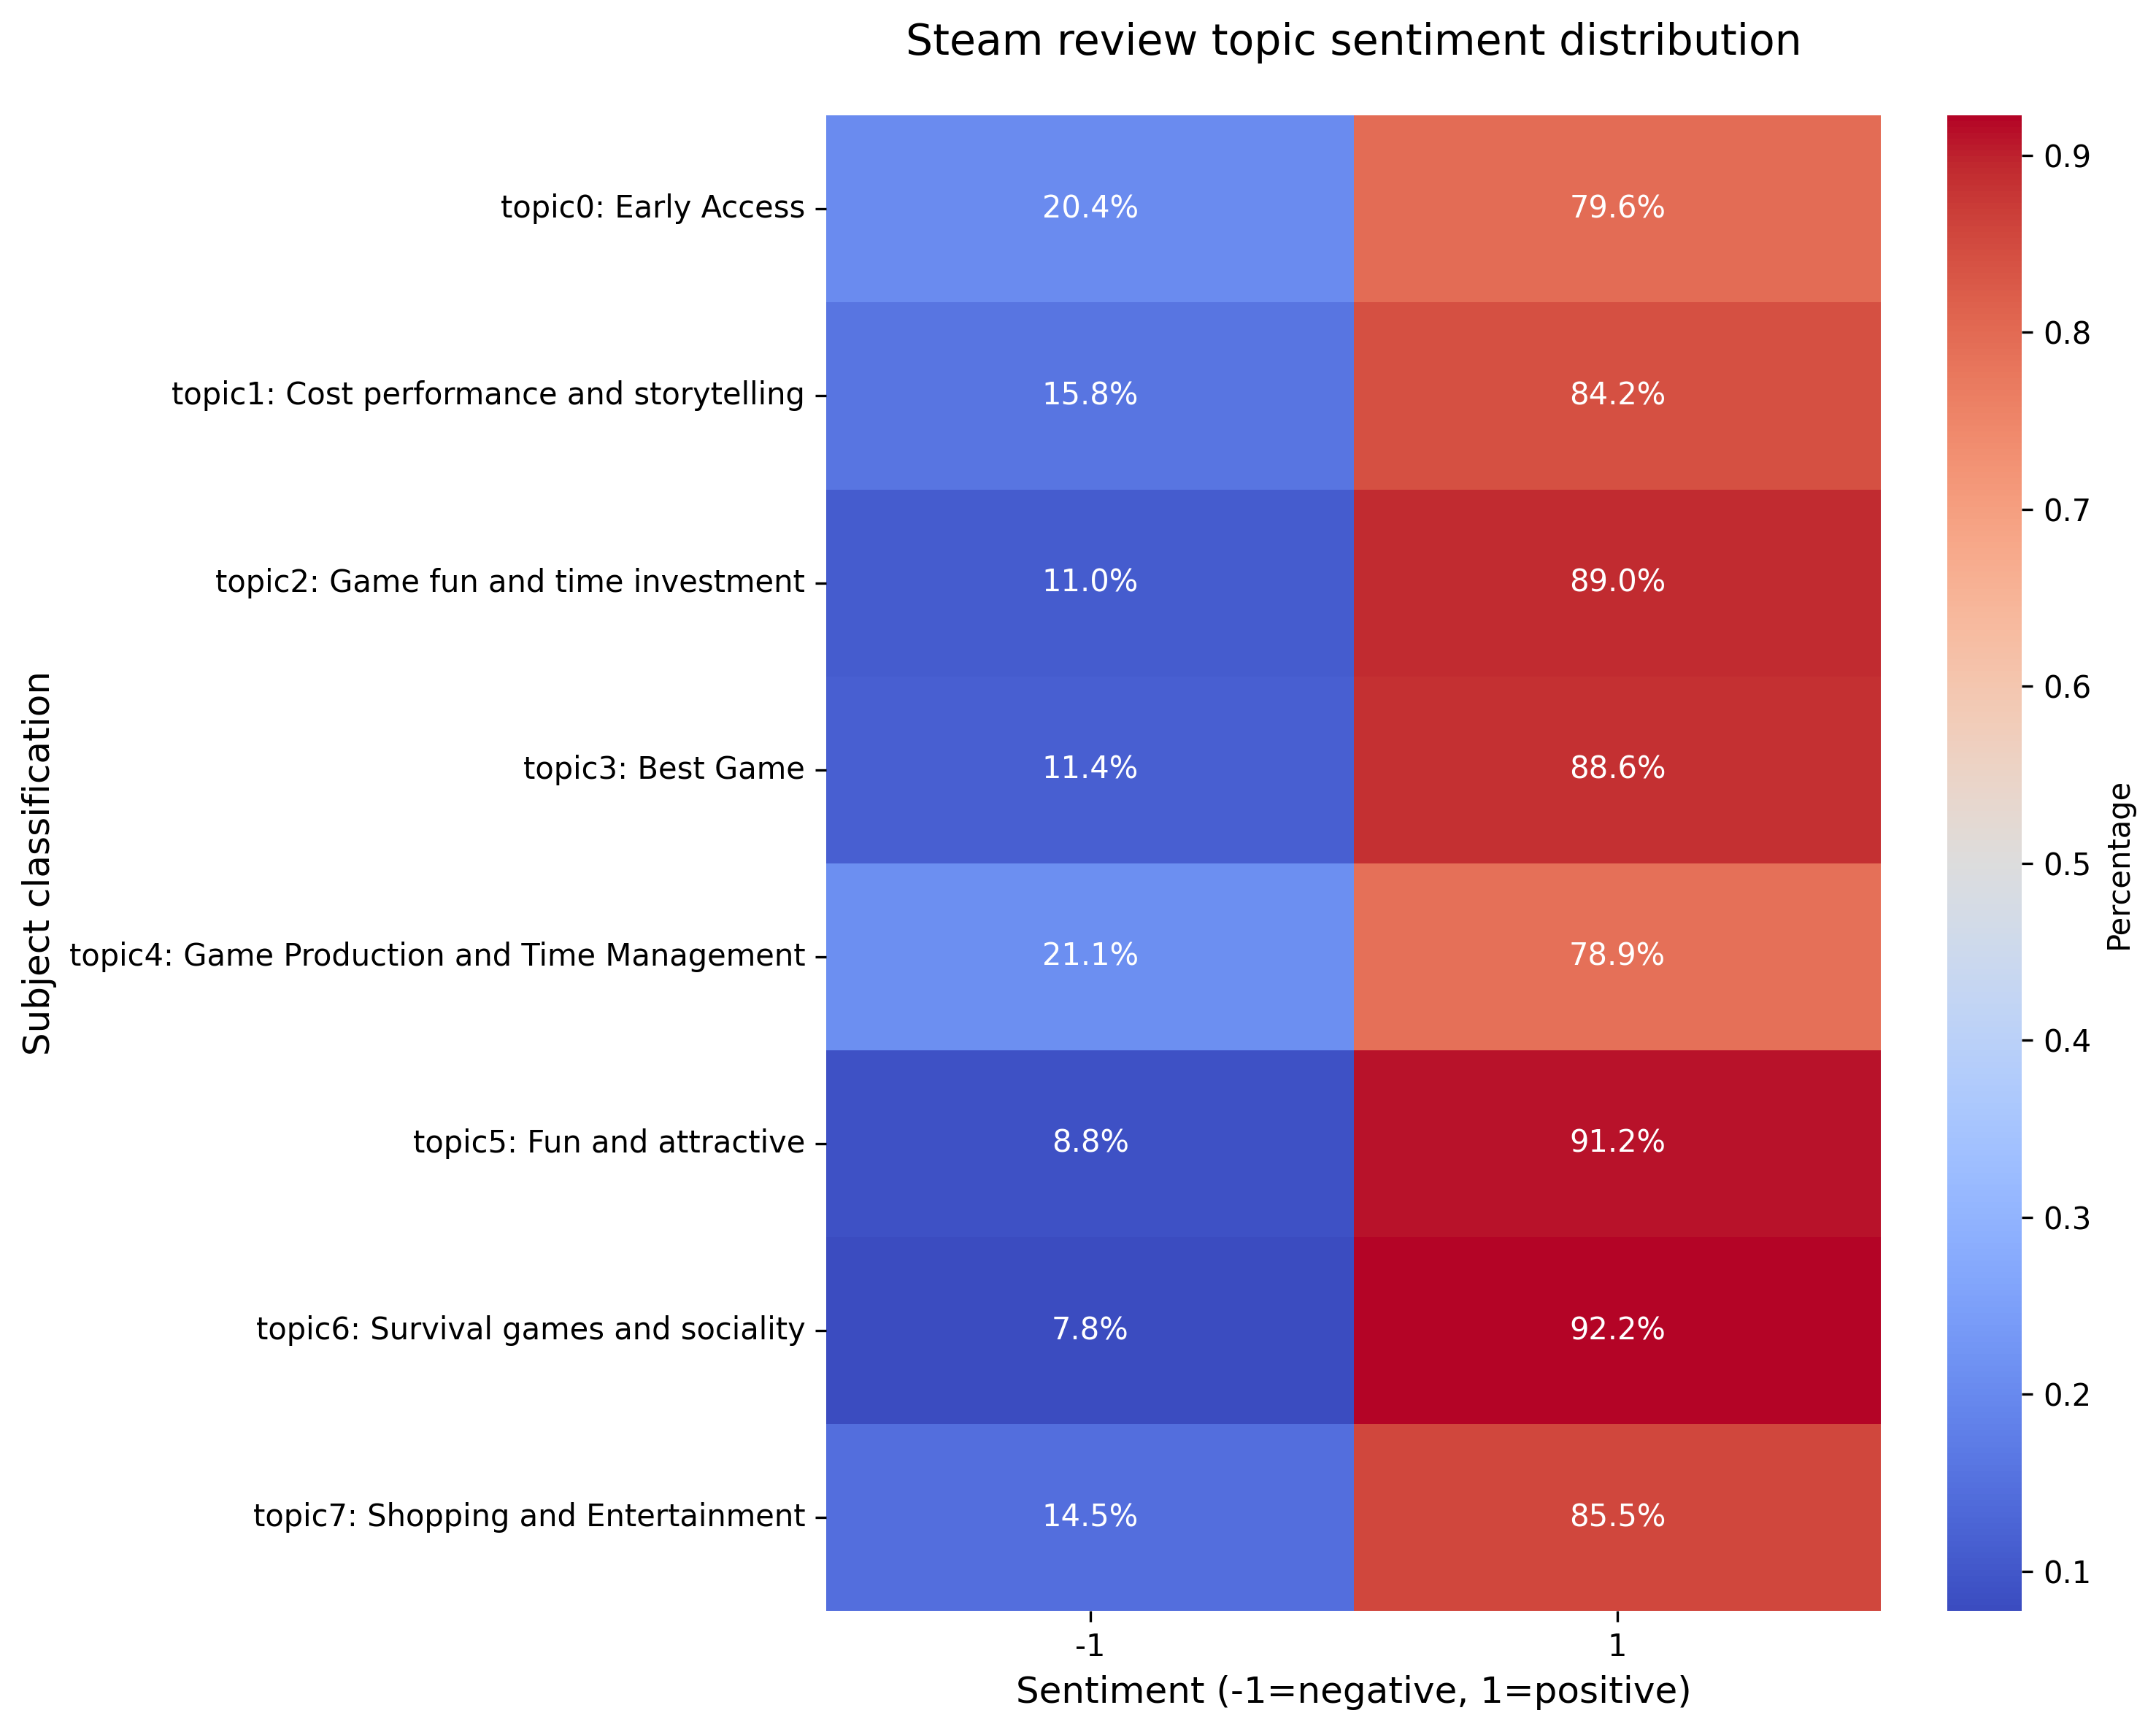

In [ ]:
plt.figure(figsize=(10, 8))

# Ensure data is sorted by subject categories
topic_sentiment = model_df.groupby('dominant_topic')['review_score'].value_counts(normalize=True).unstack().reindex(range(8), fill_value=0)

sns.heatmap(topic_sentiment, annot=True, fmt=".1%", cmap='coolwarm', cbar_kws={'label': 'Percentage'})
plt.title("Steam review topic sentiment distribution", fontsize=14, pad=20)
plt.xlabel("Sentiment (-1=negative, 1=positive)", fontsize=12)

# Customize Y-axis labels based on topic keywords
custom_labels = [
    "topic0: Early Access",
    "topic1: Cost performance and storytelling",
    "topic2: Game fun and time investment",
    "topic3: Best Game",
    "topic4: Game Production and Time Management",
    "topic5: Fun and attractive",
    "topic6: Survival games and sociality",
    "topic7: Shopping and Entertainment"
]

plt.ylabel("Subject classification", fontsize=12)
plt.yticks(ticks=np.arange(len(custom_labels)) + 0.5, labels=custom_labels, rotation=0)

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

As can be seen from the data in the figure, the positive sentiment in the Survival & Sociality category accounts for as high as 92.2%, which shows that users highly recognize the social mechanisms and gameplay design in survival games. Similarly, on the topic of Fun & Attractive, the positive sentiment accounted for 91.2%, reflecting that the fun of the game occupies an important position in the hearts of players. In contrast, the negative sentiment of the Production & Time Management topic accounted for 21.1%, the highest among all topics, which suggests that the game may have shortcomings in production and time management mechanisms and needs further optimization to improve user satisfaction. In addition, the negative sentiment of the Early Access topic also reached 20.4%, which is also worthy of attention. This shows that the experience mechanism of early content can indeed reflect the user's opinions on the game. Therefore, by strengthening communication and feedback with users, corresponding improvements and optimizations can be made in the post-production of the game.

# Part 4 : Correlation Analytics

In [ ]:
from nltk.tokenize import word_tokenize
from scipy.stats import pearsonr
import nltk
import sys
!{sys.executable} -m pip install nltk
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from scipy.stats import pointbiserialr
# Which factors have the greatest influence on emotional tendencies
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = re.sub(r'[^\w\s]', '', text).lower()
    tokens = word_tokenize(text)
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # Convert the list to a string
    return " ".join(filtered_tokens)


sampled_df['review_text'] = sampled_df['review_text'].apply(preprocess_text)

# Keyword extraction and classification
topic_keywords = {
    "Early Access": ["access review", "early access", "access", "early", "review", "story", "funny", "awesome", "find", "series"],
    "Cost performance and storytelling": ["nice", "worth", "well", "money", "crash", "story", "life", "day", "fun", "space"],
    "Game fun and time investment": ["love", "hour", "fun", "play", "make", "game", "suck", "steam", "story", "time"],
    "Best Game": ["best", "ever", "ever play", "play", "game", "recommend", "bad", "amaze", "ive", "ive ever"],
    "Game Production and Time Management": ["make", "time", "fun", "game", "well", "play", "story", "get", "even", "much"],
    "Fun and attractive": ["awesome", "ing", "funny", "addictive", "pretty", "get", "old", "much", "year", "still"],
    "Survival games and sociality": ["1010", "friend", "kill", "simulator", "zombie", "must", "want", "die", "people", "try"],
    "Shopping and Entertainment": ["fun", "buy", "cool", "free", "lot", "dont", "mod", "need", "time", "shooter"]
}


def count_keywords(text, keywords):
    return sum([1 for word in text.split() if word in keywords])

# Count the number of times each topic keyword appears in the comments
for topic, keywords in topic_keywords.items():
    sampled_df[f'{topic}_count'] = sampled_df['review_text'].apply(lambda x: count_keywords(x, keywords))

# Calculate the correlation between each topic and review_score
correlations = {}
for topic, keywords in topic_keywords.items():
    sampled_df[f'{topic}_count'] = sampled_df['review_text'].apply(lambda x: count_keywords(x, keywords))
    # Calculate the two-column correlation coefficient of the points
    corr, _ = pointbiserialr(sampled_df[f'{topic}_count'], sampled_df['review_score'])
    correlations[topic] = corr

# Identify the theme that has the greatest influence on emotional tendencies
most_influential_topic = max(correlations, key=correlations.get)
print(f"The theme that has the greatest influence on emotional tendencies is: {most_influential_topic}")

The theme that has the greatest influence on emotional tendencies is: Cost performance and storytelling


Based on LDA topic modeling, I use these 8 topics to analyse which factors have the greatest influence on emotional tendencies. The result says that "Cost performance and storytelling" influence it more.

              app_id  review_score  review_votes  review_length  \
count   20000.000000  20000.000000  20000.000000   20000.000000   
mean   227993.533100      0.645600      0.152200     194.528300   
std    125154.888112      0.763695      0.359224     373.453637   
min        10.000000     -1.000000      0.000000       0.000000   
25%    202530.000000      1.000000      0.000000      20.000000   
50%    239140.000000      1.000000      0.000000      67.000000   
75%    305620.000000      1.000000      0.000000     200.000000   
max    562220.000000      1.000000      1.000000    6224.000000   

       Early Access_count  Cost performance and storytelling_count  \
count        20000.000000                             20000.000000   
mean             0.813650                                 0.675300   
std              1.292288                                 1.319112   
min              0.000000                                 0.000000   
25%              0.000000                     

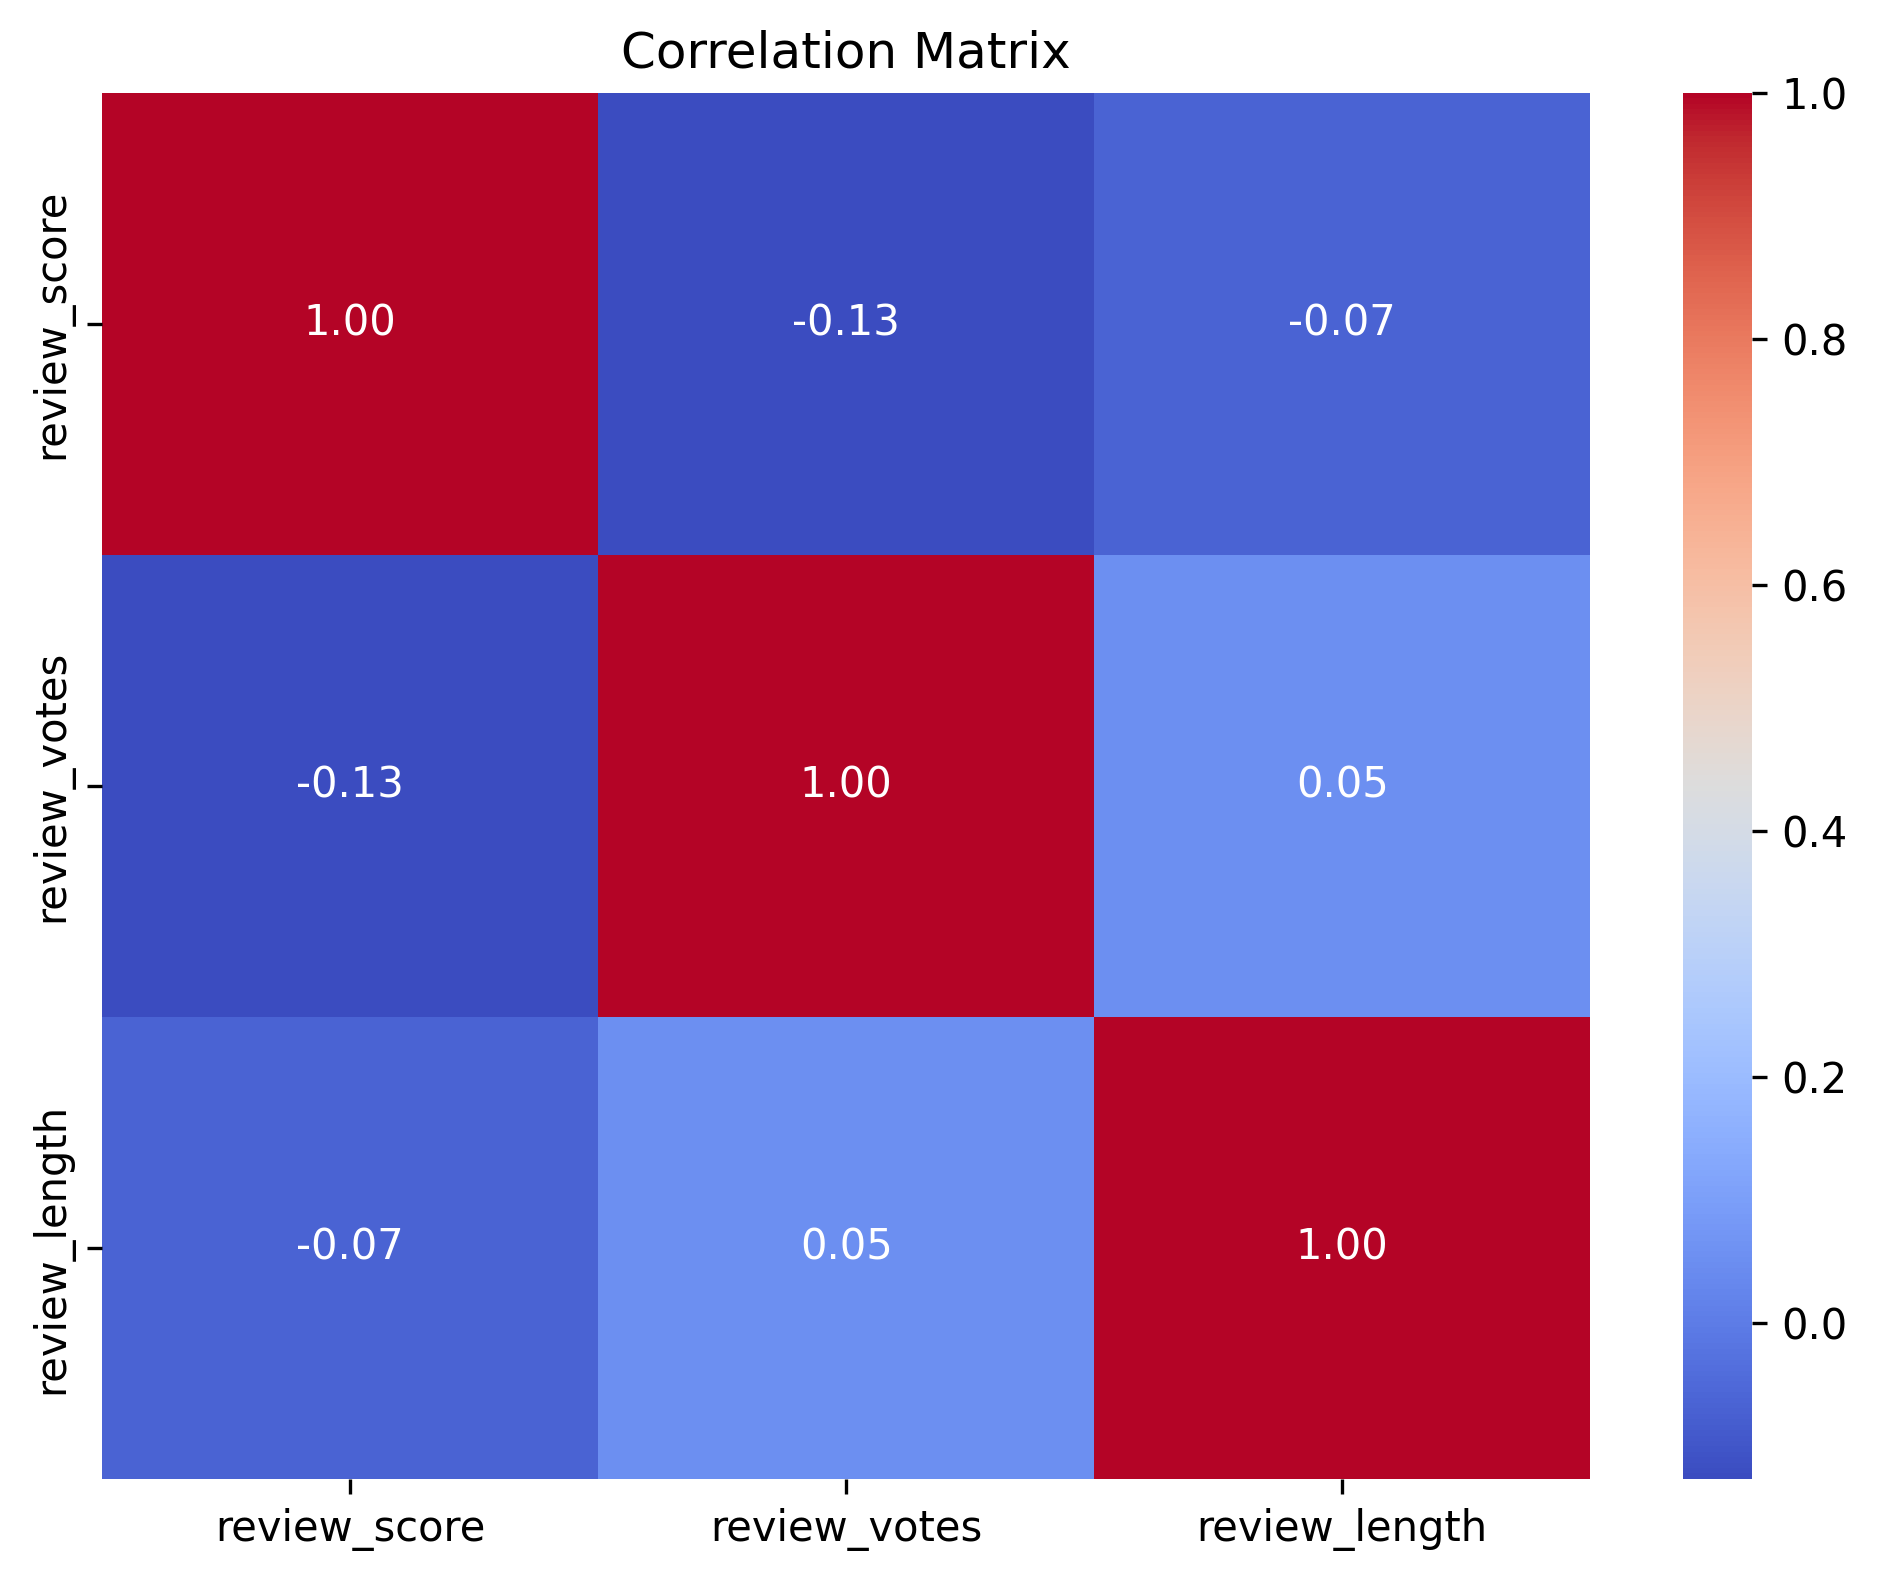

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Calculate the length of the comment
sampled_df['review_length'] = sampled_df['review_text'].apply(len)

# descriptive statistics
print(sampled_df.describe())

# correlation analysis
correlation_matrix = sampled_df[['review_score', 'review_votes', 'review_length']].corr()

# Visual correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

To explore the correlation between the sentiment positives and negatives of a review (review_score), the number of support for a review (review_vptes) and the length of a review. First, I set the calculated comment length to 'review_length', then calculated whether theirs was related or not using correlation, and finally represented it in a matrix. As you can see in the figure, all the values except themselves are around 0, indicating that the length of the comment is independent of the sentiment positive and negative and the number of comment supports

In [ ]:
import statsmodels.api as sm
import numpy as np
from scipy.stats import chi2_contingency

# Cross-table analysis
cross_tab = pd.crosstab(sampled_df['review_score'], sampled_df['review_votes'])
print("Crosstab:")
print(cross_tab)

# chi-square test
chi2, p, dof, expected = chi2_contingency(cross_tab)
print(f"chi-squared statistic: {chi2}，p-value: {p}")

# logistic regression analysis
X = sm.add_constant(sampled_df['review_score'])
y = sampled_df['review_votes']
model = sm.Logit(y, X).fit()
print(model.summary())

Crosstab:
review_votes      0     1
review_score             
-1             2657   887
 1            14299  2157
chi-squared statistic: 320.19988686527074，p-value: 1.3102724078938877e-71
Optimization terminated successfully.
         Current function value: 0.419300
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:           review_votes   No. Observations:                20000
Model:                          Logit   Df Residuals:                    19998
Method:                           MLE   Df Model:                            1
Date:                Tue, 22 Apr 2025   Pseudo R-squ.:                 0.01690
Time:                        10:33:14   Log-Likelihood:                -8386.0
converged:                       True   LL-Null:                       -8530.1
Covariance Type:            nonrobust   LLR p-value:                 1.188e-64
                   coef    std err          z      P>|z|      [0.025      0.97

Cross-tabulations, chi-square tests, and logistic regression analyses were then used to explore whether there was a significant difference in the number of votes cast between positive and negative comments. The results from the cross-tabulation yielded more positive comments in absolute terms, but the percentage of those with votes was lower than the percentage of those with votes for negative comments, which may imply that negative comments are more likely to get votes.
The chi-square test results tell us that the p-value is much less than 0.05, and we can reject the original hypothesis, indicating that there is a significant association between review_score and review_votes.
From the results of logistic regression, we know that the logarithmic incidence ratio (log-odds) of getting votes decreases by 0.3972 when review_score changes from negative comments (-1) to positive comments (1).
In other words, negative comments have a higher chance of getting votes (odds) than positive comments.
Thus, there is a significant association between the positivity of a comment and the number of votes.

In [ ]:
from scipy.stats import chi2_contingency

# （Contingency Table）
contingency_table = pd.crosstab(sampled_df['app_name'], sampled_df['review_score'])

# Perform the chi-square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
print(f"Chi2 Statistic: {chi2}, p-value: {p_value}")

Chi2 Statistic: 6086.374611557877, p-value: 1.741222343118694e-207


Finally, to validate the correlation between different applications and review sentiment, the data show that there is a highly significant difference in the distribution of review sentiment (positive/negative) across applications.

#Part 5 :Sentiment Analysis  

Convert text data into numerical vectors that can be understood by machine learning models, and divide them into training sets and test sets to prepare for subsequent modeling.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer(max_features = 3000)
tfidf = TfidfVectorizer(max_features=5000)

In [ ]:
sampled_df


,app_id,app_name,review_text,review_score,review_votes,review_length,Early Access_count,Cost performance and storytelling_count,Game fun and time investment_count,Best Game_count,Game Production and Time Management_count,Fun and attractive_count,Survival games and sociality_count,Shopping and Entertainment_count
3607269,291550,Brawlhalla,early access review,1,0,19,3,0,0,0,0,0,0,0
694102,206440,To the Moon,cried hard realize river made much origami rab...,1,0,121,0,0,0,0,2,2,1,0
6195257,65800,Dungeon Defenders,done waching vid begining stops loads ages dow...,-1,0,54,0,0,0,0,0,0,0,0
638277,205100,Dishonored,dishonored starts pretty grim find prison eve ...,1,0,541,2,2,3,5,5,3,1,2
5944031,536630,Maze Sounds,wish recommend game maybe button says partial ...,-1,0,308,0,0,1,2,3,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6220745,6860,Hitman: Blood Money,great game highly reccomended games encourage ...,1,0,81,0,2,2,1,3,0,0,1
2637333,250400,How to Survive,solid little zombie survival title totally liv...,1,0,512,1,0,1,2,1,0,3,1
1792709,230410,Warframe,nice game,1,0,9,0,1,1,1,1,0,0,0
334421,1250,Killing Floor,great game intense loads wepons,1,0,31,0,0,1,1,1,0,0,0


In [ ]:
#Convert text to vector matrix
X = cv.fit_transform(sampled_df['review_text']).toarray()
sampled_df['target'] = sampled_df['review_score'].apply(lambda x: 1 if x == 1 else 0)

In [ ]:
X.shape

(20000, 3000)

In [ ]:
y = sampled_df['target'].values

In [ ]:
y

array([1, 1, 0, ..., 1, 1, 1])

In [ ]:
#Divide the training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state = 34)

In [ ]:
X_train.shape

(16000, 3000)

In [ ]:
y_train.shape

(16000,)

In [ ]:
X_test.shape

(4000, 3000)

In [ ]:
y_test.shape

(4000,)

Use three Naive Bayes classifiers to train and evaluate sentiment classification models on text data

In [ ]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix

In [ ]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [ ]:
#Train Gaussian Naive Bayes and evaluate
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print("Accuracy_score：", accuracy_score(y_test,y_pred1))
print("Confusion_matrix：",confusion_matrix(y_test,y_pred1))
print("Precision_score:",precision_score(y_test,y_pred1))

Accuracy_score： 0.7485
Confusion_matrix： [[ 381  396]
 [ 610 2613]]
Precision_score: 0.86839481555334


In [ ]:
#Training and evaluating Multinomial Naive Bayes
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print("Accuracy_score：",accuracy_score(y_test,y_pred2))
print("Confusion_matrix：",confusion_matrix(y_test,y_pred2))
print("Precision_score:",precision_score(y_test,y_pred2))

Accuracy_score： 0.8435
Confusion_matrix： [[ 333  444]
 [ 182 3041]]
Precision_score: 0.8725968436154949


In [ ]:
#Training and evaluating BernoulliNB Naive Bayes
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print("Accuracy_score：",accuracy_score(y_test,y_pred3))
print("Confusion_matrix：",confusion_matrix(y_test,y_pred3))
print("Precision_score:",precision_score(y_test,y_pred3))

Accuracy_score： 0.75775
Confusion_matrix： [[ 254  523]
 [ 446 2777]]
Precision_score: 0.8415151515151515


We finally chose the Multinomial Naive Bayes (MultinomialNB) model for text sentiment classification. This model outperforms other Naive Bayes models in both accuracy and precision, and is well suited for count-based feature vectors.

In [ ]:
def checker(text):
    X = cv.transform([text])
    response = mnb.predict(X)[0]
    if response == 1:
        return "Positive Review"
    else:
        return "Negative Review"

In [ ]:
checker('game is a waste of time')

'Negative Review'

In [ ]:
checker('I really loved this game')

'Positive Review'